# Assignment 4

## Wyatt Smith

## Physics 494

### 1) Generalizing a Convolutional Network


In [3]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime

In [5]:
# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# determine the properties
rows,cols = x_train[0].shape
num_classes = 10

# reshape and rescale
x_train = x_train.reshape(x_train.shape[0], rows*cols).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], rows*cols).astype('float32')/255

# use a built-in function to get 1-hot encoding
y_train_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_hot = keras.utils.to_categorical(y_test, num_classes)

In [6]:
def plot_digit_array(x,y, show_prediction=False):
    '''Expects a list of digits (x) and associated labels (y)'''
    
    # determine the number of rows and columns of our image array
    num_digits = x.shape[0]
    num_cols = int(np.sqrt(num_digits))
    num_rows = num_digits//num_cols + 1

    fig,ax = plt.subplots(nrows=num_rows,ncols=num_cols,sharex=True,sharey=True,
                          figsize=(num_cols,num_rows))
    
    # plot all the numbers
    for i,cax in enumerate(ax.flatten()):
        if i < num_digits:
            cax.matshow(x[i].reshape(28,28), cmap='binary')
            cax.axis('off')
            if show_prediction:
                cax.text(0.99,0.99,f'{y[i]}',horizontalalignment='right',verticalalignment='top', 
                         transform=cax.transAxes, fontsize=8, color='r')
        else:
            cax.axis('off')

In [7]:
model = keras.Sequential(
[
    layers.Dense(128,input_shape=(rows*cols,),activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
batch_size = 32
epochs = 10

training = model.fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,
                     verbose=1, validation_data=(x_test,y_test_hot))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4347 - accuracy: 0.8767 - val_loss: 0.1341 - val_accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1254 - accuracy: 0.9637 - val_loss: 0.1086 - val_accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0803 - accuracy: 0.9765 - val_loss: 0.0887 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0566 - accuracy: 0.9820 - val_loss: 0.0867 - val_accuracy: 0.9737
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0803 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0770 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0861 - val_accuracy:

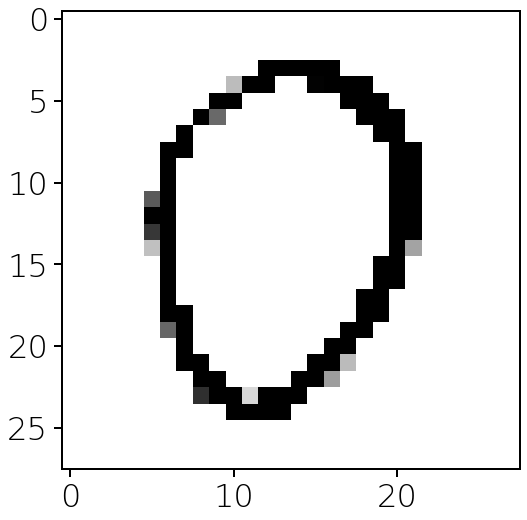

In [14]:
plt.imread("./data1/zero.png")
image = plt.imread("./data1/zero.png")
norm_image = pnorm(image)
plt.imshow(image)
plt.show()


In [147]:
from PIL import Image, ImageOps

def norm(file):
    img = Image.open(file)
    smol = img.resize((28, 28))
    smol = ImageOps.grayscale(smol)
    scale = np.array(smol, dtype='float32') ## The Type Matters Here!!
    scale -= scale.min()
    scale /= scale.max()
    
    final = np.ones((28,28))
    final -= scale
    
    for i in range(28):
        for j in range(28):       
            if final[i][j] < 0.08:
                final[i][j] = 0.0
            else:
                pass
    final /= final.max()
    
    return final

In [155]:
model(image2.reshape(1,rows*cols))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[9.4226021e-01, 3.3159886e-05, 5.6598336e-02, 1.9285508e-04, 6.7203032e-06, 3.2425953e-05, 6.2060835e-08,
        3.9703934e-08, 1.1163457e-08, 8.7626465e-04]], dtype=float32)>

In [157]:
img0 = norm("./data1/zero.png")
img1 = norm("./data1/one.png")
img2 = norm("./data1/two.png")
img3 = norm("./data1/three.png")
img4 = norm("./data1/four.png")
img5 = norm("./data1/five.png")
img6 = norm("./data1/six.png")
img7 = norm("./data1/seven.png")
img8 = norm("./data1/eight.png")
img9 = norm("./data1/nine.png")

In [160]:
model(img1.reshape(1,rows*cols))


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.0003474e-05, 9.6192664e-01, 1.2337525e-02, 3.8419769e-03, 2.3830305e-06, 5.7207416e-03, 1.0608023e-02,
        1.8205608e-05, 5.5242139e-03, 4.0239192e-07]], dtype=float32)>

In [161]:
model(img2.reshape(1,rows*cols))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[8.4775183e-06, 1.4451701e-04, 9.9627823e-01, 2.7800517e-04, 2.3760409e-04, 5.2862146e-05, 1.8361749e-05,
        8.5423875e-04, 2.1150084e-03, 1.2658236e-05]], dtype=float32)>

In [162]:
model(img3.reshape(1,rows*cols))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.3173549e-04, 7.4923687e-02, 2.1778502e-02, 3.5890087e-01, 4.8232347e-02, 9.6752450e-02, 6.0626331e-05,
        1.8683061e-02, 1.4112191e-03, 3.7912554e-01]], dtype=float32)>

In [163]:
model(img4.reshape(1,rows*cols))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.3613504e-12, 1.8145638e-06, 1.6576311e-07, 2.9257719e-05, 9.9932897e-01, 1.4642105e-04, 1.9214036e-10,
        3.4599652e-06, 1.9323328e-07, 4.8974773e-04]], dtype=float32)>

In [164]:
model(img5.reshape(1,rows*cols))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[5.6705920e-12, 2.5291962e-08, 9.7277889e-06, 2.2698255e-02, 1.9717118e-06, 9.7561502e-01, 2.4662489e-07,
        1.8675082e-07, 4.1394171e-05, 1.6332377e-03]], dtype=float32)>

In [165]:
model(img6.reshape(1,rows*cols))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[3.6813048e-04, 1.1136690e-08, 1.2661633e-03, 1.4191218e-06, 1.9013009e-03, 8.9082739e-04, 9.9550676e-01,
        1.4964697e-05, 3.5625228e-05, 1.4798777e-05]], dtype=float32)>

In [168]:
model(img7.reshape(1,rows*cols))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.2833872e-05, 4.6973219e-03, 4.5534261e-02, 4.4722017e-02, 5.4885266e-05, 6.8120607e-05, 1.9193633e-06,
        6.8943983e-01, 1.5580635e-02, 1.9987828e-01]], dtype=float32)>

In [167]:
model(img8.reshape(1,rows*cols))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[3.8971286e-04, 5.5609522e-05, 8.5779041e-01, 1.5264069e-02, 2.6348818e-03, 1.4395030e-04, 1.5133622e-05,
        1.7220716e-05, 1.2314250e-01, 5.4652872e-04]], dtype=float32)>

In [166]:
model(img9.reshape(1,rows*cols))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[3.7537649e-09, 8.5980690e-07, 1.2543705e-05, 2.6381348e-04, 9.9948561e-01, 8.1638154e-06, 6.4060307e-10,
        9.7181355e-06, 2.1464213e-04, 4.6559694e-06]], dtype=float32)>

So, it did not like all of my numbers...  

I did not have enough time to fix this unfortunately. I spend most of my time on part (a) and, unwisely, working on the final project (before I had this done). For part (a), my original normalizing/rescaling procedure from last time did not work-- it gave me a blank image, I do not know why... talking to some cohorts, they reccommended PIL, so I used that and finally got it working. 

I got all my data for the final project preprocessed, however. I tend to get obsessive over certain things like thisl ultimately it came to the detriment of this assignment. I did not have time to get a new dataset properly made from my images to retrain. 

### 2) Final Project

We already gave the slide, but here is part of the "script" I had prepared in case we missed anything (I think we did): 

>Slide I What is a Elliptic Curve? 
>
>An Elliptic Curve is a plane curve over some field,  K, satisfying the Weierstrass equation with nonzero determinant (the relevant formula are displayed here). 
The set of rational points on an elliptic curve along with an additional point at infinity form a group, usually denoted E(Q).
The binary operation we use to add points has a nice geometric description-- any two points add to the unique third point collinear to them. 
Group Structure
One of the first things we look at in a group is its structure. 
It turns out that E(Q) is finitely generated and abelian, so we can decompose it into a free part and and a torsion subgroup, consisting of the elements of infinite and finite order respectively. 
Relevant features: 
Some relevant features of an elliptic curve are its rank, the order of its torsion subgroup, and the number of integer points it contains. 
*Point to these in the equation*
The goal of our project is to use Machine learning to predict some of these properties based on a curve’s Weierstrass Coefficients. 
We plan on predicting the number of integer points minimally, and potentially predicting the torsion order if we have time.
Here is a picture of an elliptic curve 
>
>Slide II Procedure: 
>
>We will obtain all our data from the The L-functions and Modular Forms Database, which contains tons of data about different objects arising in number theory, including a huge list of elliptic curves where we know all of the aforementioned invariants. 
So, from here we will pull our relevant curves and their appropriate label. While the database is expansive, it appears that  there are only enough data points to reliably sample curves with zero or one integral points.
For this reason, our model will be a binary classifier, which will take the coefficients as an input, and output a zero or a one. 
There is one step of preprocessing we will do-- other research looking at this problem have discovered that you can get better accuracies if you instead pass a curve’s Euler Coefficients into the network instead of its Weierstrass Coefficients. 
This is probably because the Weierstrass Coefficients can take on a large range of values, whereas the Euler Coefficients are generally small integers. 
We can easily calculate the first hundred or so Euler coefficients quickly  in SageMath, which is like Python but with built-in Number Theory. 
The exact number of Euler Coefficients we compute will determine the architecture of our network; the existing literature suggests that we should get high accuracy with the first 500 coefficients. 
One of the papers we cite claims to get accuracies in the high 90s for this problem. They do not disclose their particular architecture, however, so this is something we will play around with. 
>
>References: 
>
>J. H. Silverman and  J. T. Tate, Rational Points on Elliptic Curves, second edition, Undergraduate Texts in  			Mathematics, 2015. 
>
>K. Ireland and M. Rosen, A Classical Introduction to Modern Number Theory, second edition, Graduate Texts in Mathematics 84, Springer, 1998. 
>
>The LMFDB Collaboration, The L-functions and Modular Forms Database, https://www.lmfdb.org, 2020 			 [Online, accessed April 7, 2021]. 
>
>Y.-H. He, K.-H. Lee, and T. Oliver, Machine-Learning Arithmetic Curves, arXiv:2012.04084. 

